# Ad Performance Metrics

This project analyzes mock advertising campaign data to evaluate performance across channels and creatives. The goal is to understand which ads are most effective and how performance metrics can inform budget and optimization decisions.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(123)

channels = ['Instagram', 'TikTok', 'Search', 'Display']
creatives = ['A', 'B', 'C']

rows = []

for channel in channels:
    for creative in creatives:
        impressions = np.random.randint(20000, 100000)
        ctr = np.random.uniform(0.005, 0.04)
        clicks = int(impressions * ctr)
        conversion_rate = np.random.uniform(0.02, 0.15)
        conversions = int(clicks * conversion_rate)
        spend = np.random.uniform(500, 5000)

        rows.append({
            'channel': channel,
            'creative': creative,
            'impressions': impressions,
            'clicks': clicks,
            'conversions': conversions,
            'spend': spend
        })

df = pd.DataFrame(rows)
df


,channel,creative,impressions,clicks,conversions,spend
0,Instagram,A,35725,536,26,2980.916461
1,Instagram,B,93299,2070,251,2349.159677
2,Instagram,C,75409,1646,116,2044.301073
3,TikTok,A,85647,1399,72,3626.398297
4,TikTok,B,93521,1064,45,2891.981182
5,TikTok,C,50255,1367,178,3760.048962
6,Search,A,22428,392,29,3446.245884
7,Search,B,87874,1342,136,914.472230
8,Search,C,88160,527,22,1193.370088
9,Display,A,43012,1554,182,3620.314596


In [3]:
df['ctr'] = df['clicks'] / df['impressions']
df['conversion_rate'] = df['conversions'] / df['clicks']
df['cpc'] = df['spend'] / df['clicks']
df['cpa'] = df['spend'] / df['conversions']

df


,channel,creative,impressions,clicks,conversions,spend,ctr,conversion_rate,cpc,cpa
0,Instagram,A,35725,536,26,2980.916461,0.015003,0.048507,5.561411,114.650633
1,Instagram,B,93299,2070,251,2349.159677,0.022187,0.121256,1.134860,9.359202
2,Instagram,C,75409,1646,116,2044.301073,0.021828,0.070474,1.241981,17.623285
3,TikTok,A,85647,1399,72,3626.398297,0.016334,0.051465,2.592136,50.366643
4,TikTok,B,93521,1064,45,2891.981182,0.011377,0.042293,2.718027,64.266248
5,TikTok,C,50255,1367,178,3760.048962,0.027201,0.130212,2.750584,21.123871
6,Search,A,22428,392,29,3446.245884,0.017478,0.073980,8.791444,118.836065
7,Search,B,87874,1342,136,914.472230,0.015272,0.101341,0.681425,6.724061
8,Search,C,88160,527,22,1193.370088,0.005978,0.041746,2.264459,54.244095
9,Display,A,43012,1554,182,3620.314596,0.036129,0.117117,2.329675,19.891838


In [4]:
channel_summary = df.groupby('channel').agg(
    impressions=('impressions', 'sum'),
    clicks=('clicks', 'sum'),
    conversions=('conversions', 'sum'),
    spend=('spend', 'sum')
).reset_index()

channel_summary['ctr'] = channel_summary['clicks'] / channel_summary['impressions']
channel_summary['conversion_rate'] = channel_summary['conversions'] / channel_summary['clicks']
channel_summary['cpa'] = channel_summary['spend'] / channel_summary['conversions']

channel_summary


,channel,impressions,clicks,conversions,spend,ctr,conversion_rate,cpa
0,Display,146924,4046,458,5630.777659,0.027538,0.113198,12.294274
1,Instagram,204433,4252,393,7374.377211,0.020799,0.092427,18.764319
2,Search,198462,2261,187,5554.088202,0.011393,0.082707,29.701006
3,TikTok,229423,3830,295,10278.428441,0.016694,0.077023,34.842130


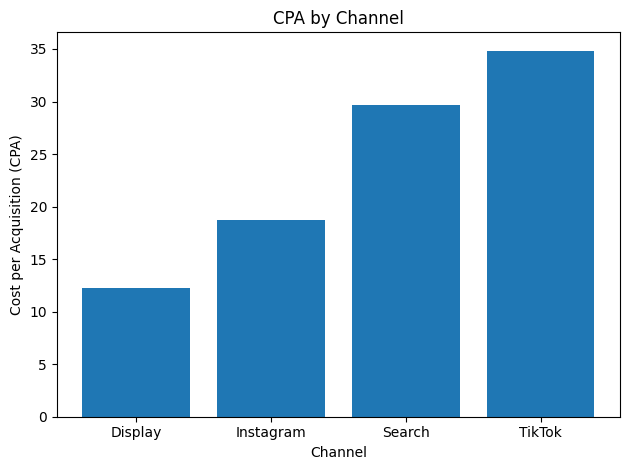

In [5]:
plt.figure()
plt.bar(channel_summary['channel'], channel_summary['cpa'])
plt.xlabel('Channel')
plt.ylabel('Cost per Acquisition (CPA)')
plt.title('CPA by Channel')
plt.tight_layout()
plt.show()


## Key Takeaways

- Ad performance varies significantly by channel.
- CPA highlights which platforms are more cost-effective.
- This analysis can guide budget allocation and creative testing.
